In [9]:
import os

import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent ## geotiff plotting

import matplotlib.pyplot as plt

In [10]:
## ca shapefile
datapath = 'data/CA_Counties'
ca = gpd.read_file(datapath).to_crs(epsg=4326)

## us shapefile
datapath = 'data/states_21basic'
us = gpd.read_file(datapath).to_crs(epsg=4326)
usa = us[(us['STATE_NAME'] != 'Hawaii') & (us['STATE_NAME'] != 'Alaska')]

# Data-Fire 

In [57]:
with pd.option_context("display.max_rows", 4):
    display(fire_shp)

,fire_ID,lat,lon,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_,landcover,landcover_,tile_ID,year,geometry
0,12,41.9062,-122.959,7.72,17.59,2016-08-31,244,2016-09-12,256,13,0.59,1.28,1.37,3,east,1,Evergreen Needleleaf forest,h08v04,2016,"POLYGON ((-122.99102 41.93333, -122.97421 41.9..."
1,8,41.8937,-122.974,20.37,40.74,2016-08-28,241,2016-09-12,256,16,1.27,2.66,1.49,8,northwest,1,Evergreen Needleleaf forest,h08v04,2016,"POLYGON ((-123.02535 41.92500, -123.01975 41.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,10562,41.6979,-120.170,0.21,1.85,2005-08-26,238,2005-08-26,238,1,0.21,0.46,0.46,0,none,0,Water,h09v04,2005,"POLYGON ((-120.17758 41.70000, -120.17200 41.7..."
4889,10567,41.6854,-120.186,1.07,4.63,2005-08-17,229,2005-08-25,237,9,0.12,0.26,0.65,1,north,0,Water,h09v04,2005,"POLYGON ((-120.19548 41.69167, -120.18433 41.6..."


# Data - Electric Transmission Line

In [58]:
cetl_file = 'California_Electric_Transmission_Line/'
cetl_shp = gpd.read_file(cetl_file)
with pd.option_context("display.max_rows", 4):
    display(cetl_shp)


,OBJECTID,Name,kV,kV_Sort,Owner,Status,Circuit,Type,Legend,Length_Mil,Length_Fee,Comments,Shape__Len,geometry
0,1001,PG&E 115kV,115,115.0,PG&E,Operational,Single,OH,PG&E_115kV,6.0,33268.72239225,None,13066.802944,"LINESTRING (-121.54456 39.07029, -121.54687 39..."
1,1002,PG&E 115kV,115,115.0,PG&E,Operational,Single,OH,PG&E_115kV,0.0,557.27733333,None,218.746290,"LINESTRING (-121.54261 39.07048, -121.54285 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,6840,PCORP 115kV,115,115.0,PCORP,Operational,Single,OH,PCORP_110_115kV,15.0,79429.59073287,None,32355.604619,"LINESTRING (-122.36031 41.71152, -122.36062 41..."
6840,6841,PCORP 69kV,69,69.0,PCORP,Operational,Single,OH,PCORP_60_69kV,6.0,31570.79147607,None,12878.622817,"LINESTRING (-122.63027 41.72868, -122.62962 41..."


In [59]:
cetl = cetl_shp.to_crs(epsg=4326)
# geometry
cetl.geometry

0       LINESTRING (-121.54456 39.07029, -121.54687 39...
1       LINESTRING (-121.54261 39.07048, -121.54285 39...
2       LINESTRING (-121.54260 39.07029, -121.54285 39...
3       LINESTRING (-121.48641 39.53277, -121.49006 39...
4       LINESTRING (-123.16468 39.17065, -123.16532 39...
                              ...                        
6836    LINESTRING (-123.82829 40.82050, -123.82839 40...
6837    LINESTRING (-120.27396 37.18498, -120.27635 37...
6838    LINESTRING (-120.19425 40.30042, -120.19471 40...
6839    LINESTRING (-122.36031 41.71152, -122.36062 41...
6840    LINESTRING (-122.63027 41.72868, -122.62962 41...
Name: geometry, Length: 6841, dtype: geometry

# Data - California Electric Substation

In [72]:
ces_file = 'California_Electric_Substation/'
ces_shp = gpd.read_file(ces_file)
with pd.option_context("display.max_rows", 4):
    display(ces_shp)
ces = ces_shp.to_crs(epsg=4326)

,OBJECTID,Substation,Substati_1,Alias,Status,Owner,Map_Owner,Map_Part,Engineerin,kV_12_TO_3,...,kV_220_To_,kV_345_To_,kV_500_DC,Highest_kV,Postal_Cit,County,Zip_Code,State,Comments,geometry
0,1,SS0003,Jenney,None,Operational,Other,Other,M,None,YES,...,None,None,None,110kV to 161kV,Alameda,Alameda,94501,CA,None,POINT (-122.24292 37.77244)
1,2,SS0004,Corona,None,Operational,PG&E,PG&E,M,None,None,...,None,None,None,110kV to 161kV,Petaluma,Sonoma,94954,CA,None,POINT (-122.65737 38.26501)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,3260,SS3648,Dave Bakkie,None,Operational,Other,Other,M,None,None,...,None,None,None,33kV to 92kV,Roseville,Placer,95747,CA,None,POINT (-121.32861 38.80155)
3260,3261,SS3649,South East,None,Operational,Other,Other,M,None,None,...,None,None,None,33kV to 92kV,Roseville,Placer,95661,CA,None,POINT (-121.23486 38.73823)


# Relationship between fire and transmisson line

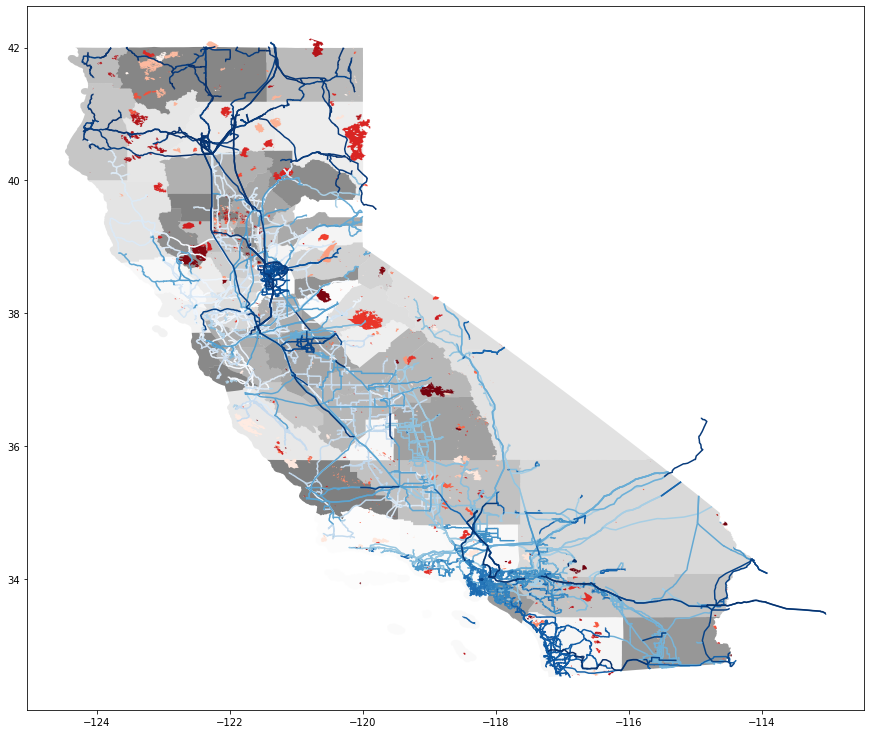

In [73]:
# plot map and transmission line
fig, ax = plt.subplots(figsize = (15, 15))
ca.plot(ax = ax, cmap = 'Greys', alpha = 0.5)
cetl.geometry.plot(ax = ax,cmap = 'Blues')

# add fire
fire_file = 'data/shapefile/ca_2.shp'
fire_shp = gpd.read_file(fire_file)

## geopandas selection (select year=2010)
shp_selected = fire_shp[fire_shp.loc[:, 'year'] >= 2010]
shp_selected.plot(ax=ax,cmap ='Reds')

# Relationship between fire and Electric Substation

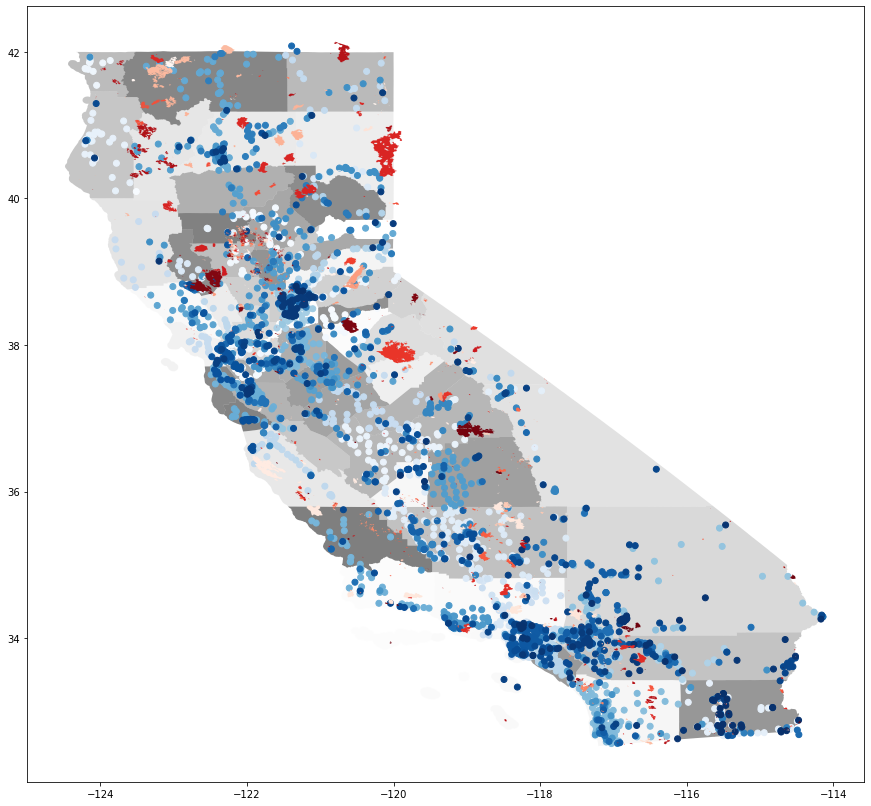

In [74]:
fig, ax = plt.subplots(figsize = (15, 15))
ca.plot(ax = ax, cmap = 'Greys', alpha = 0.5)
ces.geometry.plot(ax = ax,cmap='Blues')
shp_selected.plot(ax=ax,cmap ='Reds')

# Calculate Shortest distance from ignition points to power lines & substation

In [103]:
# lines
lines = gpd.GeoSeries(cetl.geometry)
col_name = ["lon","lat"]
# points
fire_points = gpd.GeoSeries(shp_selected.apply(lambda x:Point(x[col_name]),axis=1))
substation_points = gpd.GeoSeries(ces.geometry)

# calculate shortest distance
min_dist = np.zeros((len(fire_points),2))
power_line_distance = np.zeros(len(fire_points))
substation_distance = np.zeros(len(fire_points))

for i,point in enumerate(fire_points):
    min_dist[i][0] = np.min([point.distance(line) for line in lines])
    min_dist[i][1] = np.min([point.distance(substation) for substation in substation_points])
    power_line_distance[i] = min_dist[i][0]
    substation_distance[i] = min_dist[i][1]

(1883, 2)


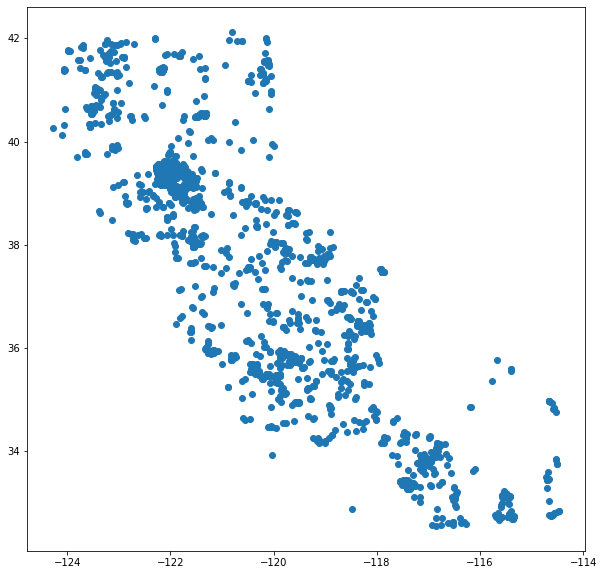

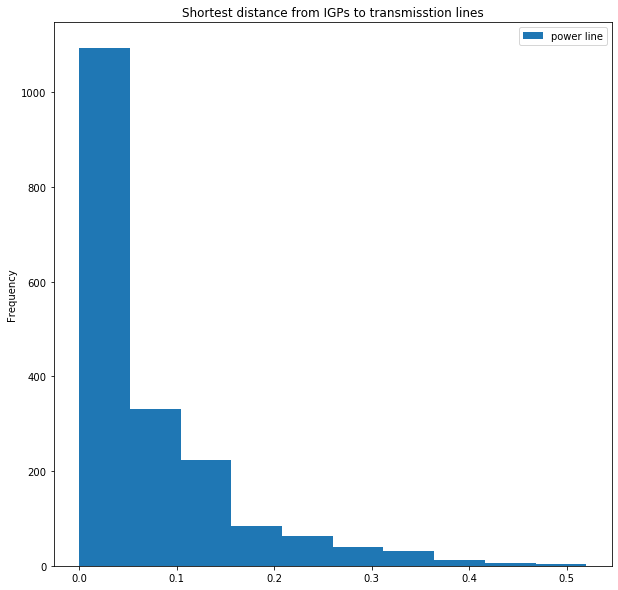

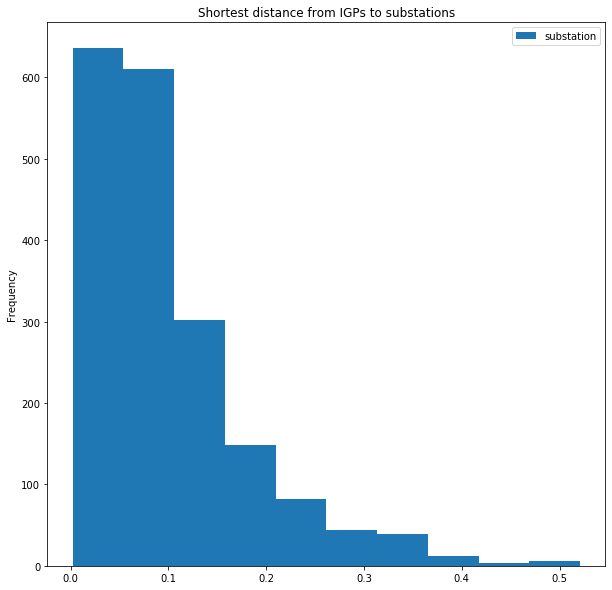

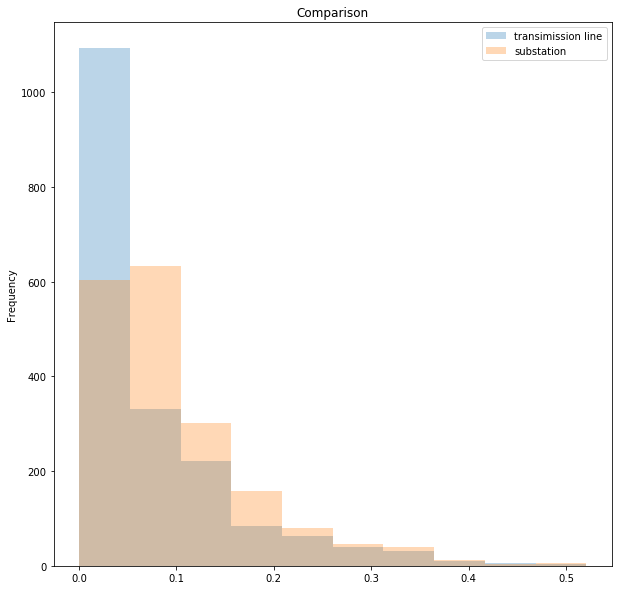

In [104]:
print(min_dist.shape)
df = pd.DataFrame(data=min_dist,columns = ['transimission line','substation'])
df1 = pd.DataFrame(data = power_line_distance,columns = ['power line'])
df2 = pd.DataFrame(data = substation_distance,columns = ['substation'])
# plot IG points
fig, ax = plt.subplots(figsize = (10, 10))
fire_points.plot(ax=ax)
# plot frequency
fig, ax = plt.subplots(figsize = (10, 10))
df1.plot.hist(ax=ax,title ='Shortest distance from IGPs to transmisstion lines')
fig, ax = plt.subplots(figsize = (10, 10))
df2.plot.hist(ax=ax,title ='Shortest distance from IGPs to substations')
fig, ax = plt.subplots(figsize = (10, 10))
df.plot.hist(ax=ax,title='Comparison',alpha=0.3)

# Calculate # of transmission lines & substations in range 5,10,15,20,50 km

In [108]:
# set range
R = 0.2
count_line = np.zeros(len(fire_points))
count_substation = np.zeros(len(fire_points))

# count # of transmission lines in range
for i,point in enumerate(fire_points):
    for line in lines:
        distance = point.distance(line)
        if(distance<=R):
            count_line[i]+=1


In [109]:
# count # of substations in range
for i,point in enumerate(fire_points):
    for point2 in substation_points:
        distance = point.distance(point2)
        if(distance<=R):
            count_substation[i]+=1
print(count_substation)

[3. 3. 4. ... 9. 9. 3.]


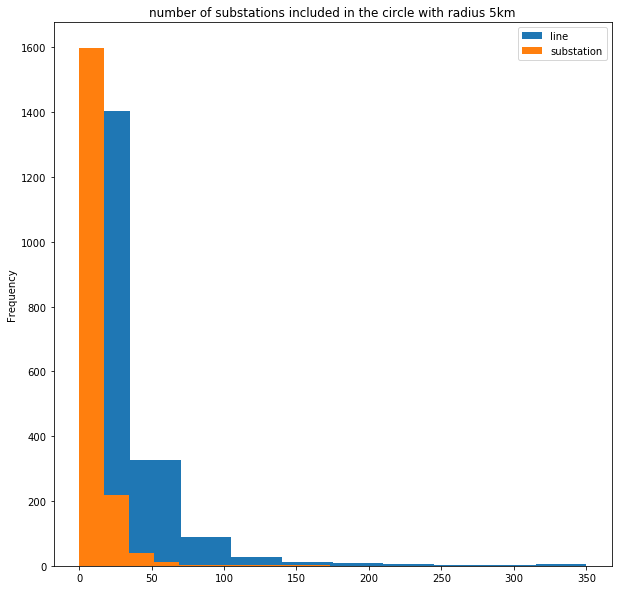

In [110]:
# frequency
df = pd.DataFrame(data=count_line,columns = ['line'])
df2 = pd.DataFrame(data=count_substation,columns = ['substation'])

fig, ax = plt.subplots(figsize = (10, 10))
df.plot.hist(ax=ax,title ='number of lines included in the circle with radius 5km')
df2.plot.hist(ax=ax,title ='number of substations included in the circle with radius 5km')